<a href="https://colab.research.google.com/github/marianwitkowski/python-ml/blob/master/otomoto-features-importances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

## Wczytaj dane z CSV

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/marianwitkowski/python-ml/master/dane-otomoto-vw.csv", 
                 sep='\t', na_values=['?'])
df.head()

,ID,Data,Link,Nazwa,Cena,Lokalizacja,Rocznik,Przebieg,Paliwo,Nadwozie,...,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Stan,Pierwszy właściciel,Metalik,Możliwość finansowania,VIN,Pojemność skokowa,Wyposażenie
0,6069409698,2019-12-28 20:54:00,https://www.otomoto.pl/oferta/volkswagen-passa...,Volkswagen Passat B6,19500PLN,"Piaseczno, piaseczyński, Mazowieckie",2008,265 340 km,Diesel,Sedan,...,Tak,Tak,NaN,Używane,NaN,NaN,NaN,wvwzzz3cz9e036324,1 896 cm3,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
1,6069322818,2019-12-28 20:52:00,https://www.otomoto.pl/oferta/volkswagen-passa...,Volkswagen Passat B7,32000PLN,"Łomnica, jeleniogórski, Dolnośląskie",2011,205 000 km,Diesel,Kombi,...,Tak,Tak,NaN,Używane,NaN,Tak,NaN,WVWZZZ3CZBE390957,1 600 cm3,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
2,6069409878,2019-12-28 20:46:00,https://www.otomoto.pl/oferta/volkswagen-passa...,Volkswagen Passat B6,11500PLN,"Warszawa, Mazowieckie, Wola",2008,373 000 km,Diesel,Kombi,...,Tak,Tak,NaN,Używane,NaN,Tak,NaN,NaN,1 968 cm3,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
3,6068447707,2019-12-28 20:45:00,https://www.otomoto.pl/oferta/volkswagen-passa...,Volkswagen Passat B8,69800PLN,"Piła, pilski, Wielkopolskie",2017,104 000 km,Diesel,Kombi,...,NaN,Tak,Tak,Używane,Tak,Tak,Tak,NaN,1 998 cm3,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
4,6069140421,2019-12-28 20:23:00,https://www.otomoto.pl/oferta/volkswagen-passa...,Volkswagen Passat B7,41900PLN,"Stargard Szczeciński, stargardzki, Zachodniopo...",2014,198 000 km,Diesel,Sedan,...,Tak,Tak,Tak,Używane,NaN,Tak,NaN,WVWZZZ3CZFE024657,1 968 cm3,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...


## Wybór cech z DataFrame

In [3]:
df1=df[ ['ID', 'Cena', 'Rocznik',
       'Przebieg', 'Paliwo',
       'Marka pojazdu', 'Model pojazdu', 'Wersja', 'Kategoria',  'Moc',
       'Skrzynia biegów', 'Typ', 'Kolor',
       'Perłowy','Zarejestrowany w Polsce', 'Bezwypadkowy', 'Serwisowany w ASO', 
       'Pierwszy właściciel', 'Metalik', 'Możliwość finansowania', 
       'Pojemność skokowa', 'Wyposażenie'] ]

## Czyszczenie/przekształcanie danych i likwidacja NaN

In [4]:
df1.isna().sum()

ID                            0
Cena                          0
Rocznik                       0
Przebieg                      0
Paliwo                        0
Marka pojazdu                 1
Model pojazdu                 1
Wersja                        1
Kategoria                     1
Moc                          28
Skrzynia biegów              26
Typ                           1
Kolor                         1
Perłowy                    2505
Zarejestrowany w Polsce    1426
Bezwypadkowy                  1
Serwisowany w ASO          1080
Pierwszy właściciel        1563
Metalik                     887
Możliwość finansowania     1634
Pojemność skokowa            32
Wyposażenie                 101
dtype: int64

In [5]:
df1.rename(columns={'Pojemność skokowa':'Pojemnosc'}, inplace=True)
df1 = df1[df1.Cena.str.contains('PLN')]

columns = ["Perłowy", "Zarejestrowany w Polsce", "Bezwypadkowy", "Serwisowany w ASO", 
           "Pierwszy właściciel", "Metalik", "Możliwość finansowania" ]
for column in columns:
    df1[column].replace({ "Tak" : 1, np.NaN : 0 }, inplace=True)
    df1[column] = df1[column].astype('int')

In [6]:
def only_digits(s):
    try:
        return int("".join( [x for x in s if x.isdigit()] ))
    except:
        return pd.np.NaN
    
def engine_cap(s):
    try:
        return int(s.replace("cm3", "").replace(" ","").strip())
    except:
        return pd.np.NaN

df1.Cena = df1.Cena.apply(only_digits)
df1.Przebieg = df1.Przebieg.apply(only_digits) 
df1.Moc = df1.Moc.apply(only_digits) 
df1.Pojemnosc = df1.Pojemnosc.apply(engine_cap) 

In [7]:
df1.dropna(inplace=True)
df1.isna().sum()

ID                         0
Cena                       0
Rocznik                    0
Przebieg                   0
Paliwo                     0
Marka pojazdu              0
Model pojazdu              0
Wersja                     0
Kategoria                  0
Moc                        0
Skrzynia biegów            0
Typ                        0
Kolor                      0
Perłowy                    0
Zarejestrowany w Polsce    0
Bezwypadkowy               0
Serwisowany w ASO          0
Pierwszy właściciel        0
Metalik                    0
Możliwość finansowania     0
Pojemnosc                  0
Wyposażenie                0
dtype: int64

## Analizowane dane dotyczą modelu B8

In [8]:
df_B8 = df1[ df1.Wersja.str.startswith('B8')]
df_B8.drop(columns=['Wersja','ID','Marka pojazdu','Model pojazdu'], inplace=True)
df_B8["Rocznik"] = df_B8.Rocznik.astype('int')
df_B8.reset_index(drop=True, inplace=True)

## Ekstakcja kolumny z wyposażeniem i zamiana etykiet na wartości dyskretne

In [9]:
wyposazenie = df_B8["Wyposażenie"]
df_B8.drop(columns=["Wyposażenie"], inplace=True)
df_B8 = pd.get_dummies(df_B8)
df_B8

,Cena,Rocznik,Przebieg,Moc,Perłowy,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Pierwszy właściciel,Metalik,...,Kolor_Bordowy,Kolor_Brązowy,Kolor_Czarny,Kolor_Czerwony,Kolor_Inny kolor,Kolor_Niebieski,Kolor_Srebrny,Kolor_Szary,Kolor_Zielony,Kolor_Złoty
0,69800,2017,104000.0,150.0,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1,115900,2019,1.0,150.0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,89790,2016,89000.0,150.0,0,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
3,49800,2016,184000.0,150.0,1,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,59900,2016,116000.0,150.0,0,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,65000,2014,170000.0,150.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1501,161730,2019,1.0,190.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1502,83900,2016,113000.0,190.0,0,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1503,69999,2015,153000.0,150.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Przekształcenie kolumny z wyposażeniem (one-hot encoding)

In [10]:
params = set()
def unique_params(s):
    items = s.upper().split("|")
    for item in items:
        if item!="NAN":
            params.add(item)
    
wyposazenie.apply(unique_params)

0       None
1       None
2       None
3       None
4       None
        ... 
1500    None
1501    None
1502    None
1503    None
1504    None
Name: Wyposażenie, Length: 1505, dtype: object

In [11]:
params_list = []
def new_columns(s):
    dict_param = {}
    items = s.upper().split("|")
    for item in items:
        if item=="NAN":
            continue
        dict_param[item] = 1
    params_list.append(dict_param)
    return dict_param
    
wyposazenie.apply(new_columns)
df_params = pd.DataFrame(params_list)

In [12]:
df_params.fillna(0, inplace=True)
df_params = df_params.astype('int')
df_params

,ABS,ELEKTRYCZNE SZYBY PRZEDNIE,PODUSZKA POWIETRZNA KIEROWCY,WSPOMAGANIE KIEROWNICY,ASR (KONTROLA TRAKCJI),CZUJNIK ZMIERZCHU,DACH PANORAMICZNY,ELEKTRYCZNE SZYBY TYLNE,ISOFIX,KLIMATYZACJA DWUSTREFOWA,...,PODGRZEWANA PRZEDNIA SZYBA,TAPICERKA WELUROWA,ASYSTENT PARKOWANIA,RADIO NIEFABRYCZNE,PODGRZEWANE TYLNE SIEDZENIA,REGULOWANE ZAWIESZENIE,HAK,HUD (WYŚWIETLACZ PRZEZIERNY),KLIMATYZACJA MANUALNA,TUNER TV
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,1,1,1,1,1,1,0,1,1,1,...,0,0,1,0,0,0,1,0,0,1
1501,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1502,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1503,1,1,1,1,1,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,1


## Łączenie DataFrame

In [13]:
result = pd.merge(df_B8, df_params, left_index=True, right_index=True)
result.columns = result.columns.str.upper()
result

,CENA,ROCZNIK,PRZEBIEG,MOC,PERŁOWY,ZAREJESTROWANY W POLSCE,BEZWYPADKOWY,SERWISOWANY W ASO,PIERWSZY WŁAŚCICIEL,METALIK,...,PODGRZEWANA PRZEDNIA SZYBA,TAPICERKA WELUROWA,ASYSTENT PARKOWANIA,RADIO NIEFABRYCZNE,PODGRZEWANE TYLNE SIEDZENIA,REGULOWANE ZAWIESZENIE,HAK,HUD (WYŚWIETLACZ PRZEZIERNY),KLIMATYZACJA MANUALNA,TUNER TV
0,69800,2017,104000.0,150.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,115900,2019,1.0,150.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,89790,2016,89000.0,150.0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,49800,2016,184000.0,150.0,1,0,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
4,59900,2016,116000.0,150.0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,65000,2014,170000.0,150.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1501,161730,2019,1.0,190.0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1502,83900,2016,113000.0,190.0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1503,69999,2015,153000.0,150.0,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1


## Podział na zmienne zależne i niezależne

In [14]:
X = result.iloc[:, 1:]
y = result.iloc[:, 0]
X.shape, y.shape

((1505, 105), (1505,))

## Wybór i trenowanie modelu

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Dokładność:",model.score(X_test, y_test)*100,"%")

Dokładność: 94.58244512458158 %


## Określanie znaczących cech modelu

In [18]:
features = pd.Series(model.feature_importances_*100, index=X.columns)
features.sort_values(ascending=False).apply(lambda x: round(x,5)).head(10)

PRZEBIEG                    56.06028
ROCZNIK                     20.79557
MOC                         15.06524
SKRZYNIA BIEGÓW_MANUALNA     1.03992
PALIWO_DIESEL                0.58443
PALIWO_BENZYNA               0.55288
POJEMNOSC                    0.38774
KAMERA COFANIA               0.35179
REGULOWANE ZAWIESZENIE       0.31915
TAPICERKA SKÓRZANA           0.28673
dtype: float64

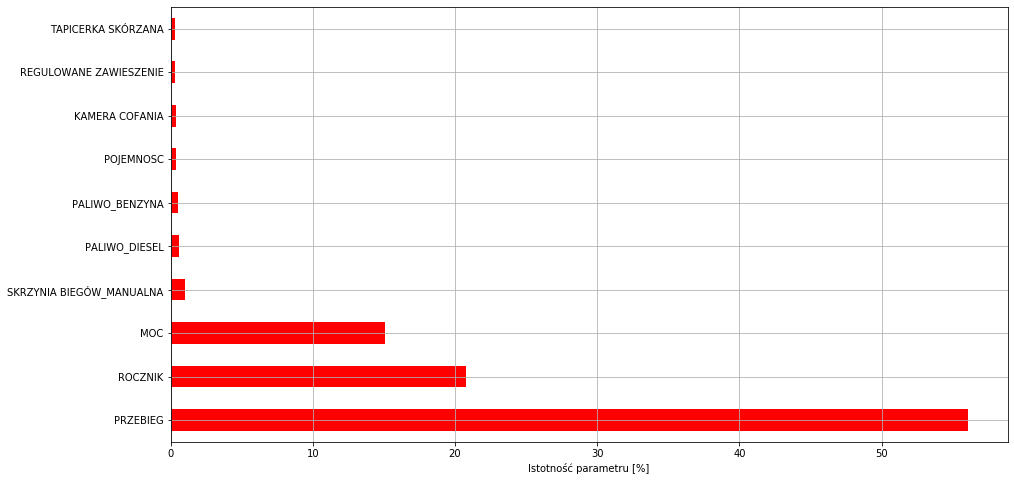

In [19]:
features.nlargest(10).plot(kind='barh', color='red', grid=True, figsize=(15,8))
plt.xlabel('Istotność parametru [%]')
plt.show()

In [20]:
df = pd.DataFrame( np.c_[X_test.PRZEBIEG.values, y_pred], columns=['Przebieg','Cena'] )
df = df.sort_values('Przebieg')
df = df.groupby('Przebieg').median()

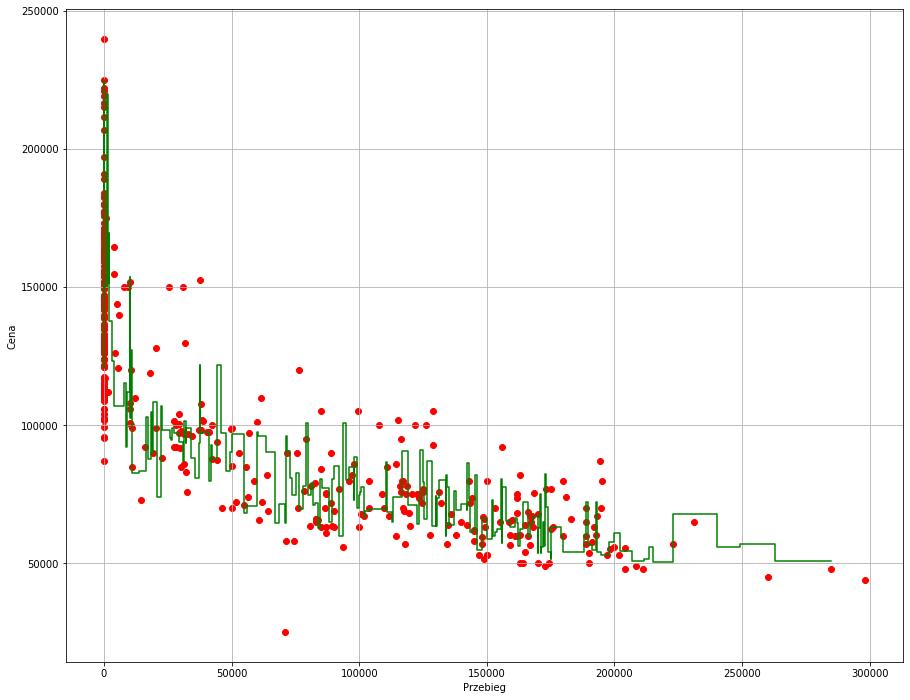

In [21]:
plt.figure(figsize=(15,12))

df_temp = result.sample(frac=0.25) #zredukowano liczbę punktów do wyświetlenie w celu zapobieżenia overplotingowi
plt.scatter(df_temp.PRZEBIEG, df_temp.CENA, c='r')
plt.step(df.index, df.Cena, c='g')

plt.xlabel('Przebieg')
plt.ylabel('Cena')
plt.grid()
plt.show()